In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL
from matplotlib import pyplot as plt

from split.evaluation import load_model
import datasets.FinTabNet.FinTabNet
from utils.visualization import create_split_result_image

In [2]:
m = load_model('checkpoints/split_fin_tab_net.ckpt', False)

2022-02-22 08:02:46.857413: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-02-22 08:02:47.160463: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open checkpoints/split_fin_tab_net.ckpt: DATA_LOSS: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?


In [3]:
ds = tfds.load('fin_tab_net_split', split='test')
ds = ds.shuffle(128, seed=42)

In [4]:
def get_predictions(test_image):
    test_image = tf.expand_dims(test_image, 0)
    outputs = m(test_image)
    return (
        tf.squeeze(outputs['horz_split_points_binary'], 0),
        tf.squeeze(outputs['vert_split_points_binary'], 0)
    )

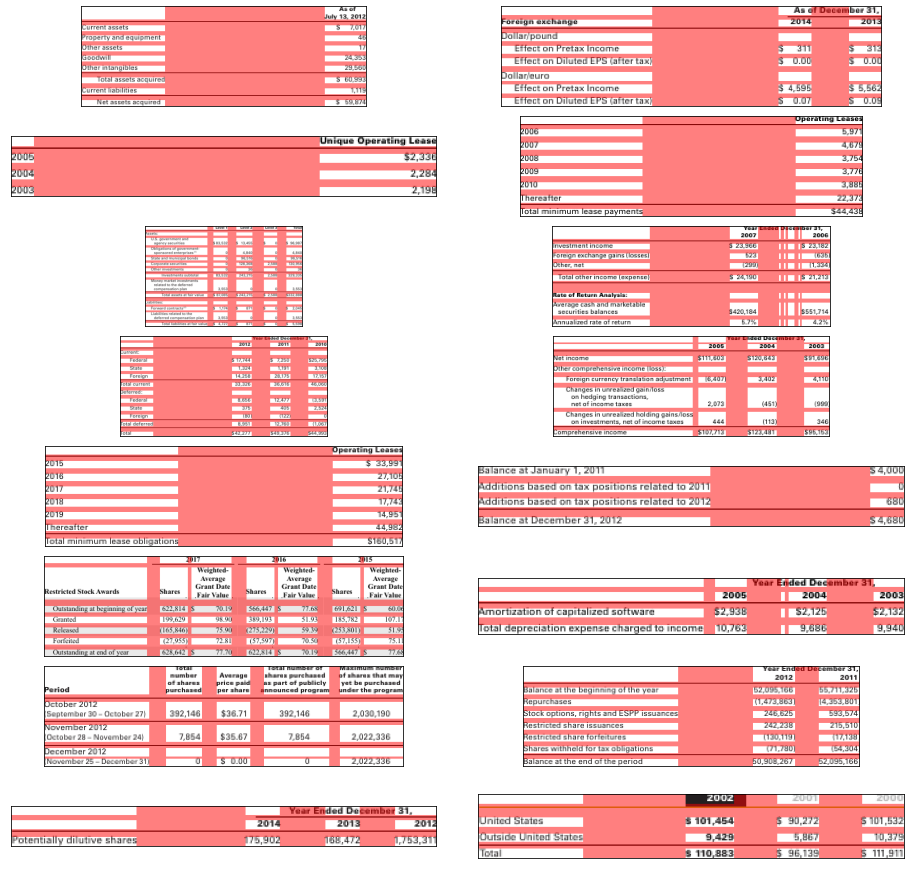

In [5]:
fig, axes = plt.subplots(8, 2, figsize=(16,16))

for element, ax in zip(ds.take(16), axes.flat):
    horz_split_points_predictions, vert_split_points_predictions = get_predictions(element['image'])
    pil_image = PIL.Image.fromarray(element['image'].numpy())
    debug_image = create_split_result_image(
        pil_image, horz_split_points_predictions.numpy(), vert_split_points_predictions.numpy())
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(debug_image)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

plt.savefig('images/split_model_predictions.png', bbox_inches='tight')
plt.show()